# Парсинг 

**Задачи**

- Собрать данные о продажах квартир в Перми (район, цена, этаж, площадь, кол-во комнат) с сайта avito.
- Найти топ-5 самых дорогих, дешевых квартир.

- Разделить квартиры на группы по районам, кол-во комнату, этажам. Рассчитать кол-во квартир и среднюю цену в каждой группе. 
- Оценить, где самые дорогие/дешевые квартиры.

- Построить гистограмму, ящик с усами для различных групп.
- Разработать функцию, которая формирует рейтинг квартир с заданными весам, к примеру (цена – вес 40%, площадь – вес 60%)

 Оценить самую популярную площадь, район, кол-во комнат.               

### 1. Собираем данные о продажах квартир в Перми с сайта avito

In [2]:
from bs4 import BeautifulSoup
from selenium.webdriver import Chrome
import pandas as pd
import numpy as np

In [23]:
browser = Chrome('chromedriver.exe')

In [24]:
# Количество страниц для парсинга
depth = 5

In [25]:
url = 'https://www.avito.ru/perm/kvartiry/prodam-ASgBAgICAUSSA8YQ'

In [26]:
def parser_on_page(i):
    browser.get(url+f'?p={i}')
    page = BeautifulSoup(browser.page_source, 'html.parser')
    
    address_tmp = []
    floor_tmp = []
    plan_tmp =[]
    price_tmp = []
    square_tmp = []
    
    selector = '.js-item-extended'
    for item in page.select(selector):
        
        address = item.select('.item-address-georeferences-item__content')
        plan_square_floor = item.select('.snippet-title-row')
        price = item.select('.snippet-price')
        
        if plan_square_floor and address and price:
            
            plan_square_floor = plan_square_floor[0].text.strip()
            plan, square, floor = plan_square_floor.split(',')
            address = address[0].text.strip()
            price = price[0].text.strip()

            address_tmp.append(address)
            floor_tmp.append(floor)
            plan_tmp.append(plan)
            price_tmp.append(price)
            square_tmp.append(square)

    return address_tmp,floor_tmp,plan_tmp, price_tmp,square_tmp

In [27]:
address_list = []
floor_list = []
plan_list =[]
price_list = []
square_list = []

for n in range(1,depth):
    address, floor,plan, price,square = parser_on_page(n)
         
    address_list += address
    floor_list += floor
    plan_list += plan
    price_list += price
    square_list += square

##### Формируем датафрейм и записываем в CSV-файл

In [28]:
df_0 = pd.DataFrame(
    {  
        'address': address_list,
        'floor': floor_list,
        'plan': plan_list,
        'price': price_list,
        'square' : square_list
    })

#df_0.to_csv('avito.csv', sep=',', encoding='utf-8', index=False)
df_0.head()

,address,floor,plan,price,square
0,р-н Мотовилихинский,9/17 эт.,4-к квартира,10 900 000 ₽,140 м²
1,р-н Свердловский,11/19 эт.,3-к квартира,7 400 000 ₽,91.6 м²
2,р-н Свердловский,1/31 эт.,3-к квартира,5 385 250 ₽,82.9 м²
3,р-н Свердловский,9/9 эт.,Квартира-студия,850 000 ₽,17.5 м²
4,р-н Орджоникидзевский,8/9 эт.,1-к квартира,1 900 000 ₽,33.3 м²


### 2. Поиск топ-5 самых дорогих, дешевых квартир

In [3]:
df = pd.read_csv('avito.csv')
df

,address,floor,plan,price,square
0,р-н Дзержинский,2/5 эт.,3-к квартира,2 600 000 ₽,42.4 м²
1,р-н Дзержинский,10/18 эт.,1-к квартира,3 390 000 ₽,39.2 м²
2,р-н Свердловский,19/26 эт.,3-к квартира,9 500 000 ₽,91.1 м²
3,р-н Ленинский,2/8 эт.,2-к квартира,6 999 000 ₽,63.6 м²
4,р-н Орджоникидзевский,5/5 эт.,1-к квартира,1 360 254 ₽,32 м²
...,...,...,...,...,...
2419,р-н Кировский,1/5 эт.,Квартира-студия,1 184 000 ₽,29.6 м²
2420,р-н Орджоникидзевский,5/5 эт.,1-к квартира,1 130 000 ₽,29 м²
2421,р-н Свердловский,4/10 эт.,3-к квартира,6 600 000 ₽,86.8 м²
2422,р-н Кировский,5/5 эт.,2-к квартира,1 800 000 ₽,38 м²


In [4]:
df.dtypes

address    object
floor      object
plan       object
price      object
square     object
dtype: object

##### Обработка данных в колонке **price**

In [5]:
df['price'] = df.price.str.replace(' ', '')
df['price'] = df.price.str.extract('([0-9]+)')
df['price'] = df['price'].astype(float)
df.head()

,address,floor,plan,price,square
0,р-н Дзержинский,2/5 эт.,3-к квартира,2600000.0,42.4 м²
1,р-н Дзержинский,10/18 эт.,1-к квартира,3390000.0,39.2 м²
2,р-н Свердловский,19/26 эт.,3-к квартира,9500000.0,91.1 м²
3,р-н Ленинский,2/8 эт.,2-к квартира,6999000.0,63.6 м²
4,р-н Орджоникидзевский,5/5 эт.,1-к квартира,1360254.0,32 м²


##### Топ 5 самых дорогих квартир

In [6]:
dfl = df.nlargest(5,'price').reset_index()
dfl

,index,address,floor,plan,price,square
0,166,р-н Свердловский,17/20 эт.,5-к квартира,27000000.0,180.9 м²
1,154,р-н Свердловский,20/21 эт.,2-к квартира,25000000.0,76.4 м²
2,173,р-н Свердловский,6/24 эт.,3-к квартира,25000000.0,126.8 м²
3,1374,р-н Свердловский,12/24 эт.,4-к квартира,24900000.0,165 м²
4,1093,р-н Свердловский,6/6 эт.,5-к квартира,22000000.0,200 м²


##### Топ 5 самых дешевых

In [7]:
dfl = df.nsmallest(5,'price').reset_index()
dfl

,index,address,floor,plan,price,square
0,1217,р-н Свердловский,1/5 эт.,1-к квартира,500000.0,13.5 м²
1,1302,р-н Свердловский,1/5 эт.,1-к квартира,555000.0,17 м²
2,234,р-н Свердловский,2/3 эт.,Квартира-студия,650000.0,13.5 м²
3,1122,р-н Кировский,2/5 эт.,1-к квартира,670000.0,14 м²
4,220,р-н Дзержинский,3/5 эт.,1-к квартира,700000.0,18 м²


### 3. Делим квартиры на группы по районам, кол-во комнату, этажам. Рассчитываем кол-во квартир и среднюю цену в каждой группе

##### Обработка данных в колонке **square**

In [8]:
df['square'] = df.square.str.replace(' м²', '')
df['square'] = df.square.str.replace(' ', '')
df['square'] = df['square'].astype(float)
df.head()

,address,floor,plan,price,square
0,р-н Дзержинский,2/5 эт.,3-к квартира,2600000.0,42.4
1,р-н Дзержинский,10/18 эт.,1-к квартира,3390000.0,39.2
2,р-н Свердловский,19/26 эт.,3-к квартира,9500000.0,91.1
3,р-н Ленинский,2/8 эт.,2-к квартира,6999000.0,63.6
4,р-н Орджоникидзевский,5/5 эт.,1-к квартира,1360254.0,32.0


##### Обработка данных в колонке floor

In [9]:
df['floorsTotal'] = df['floor'].apply(lambda x:x.split('/')[1])
df['floorsTotal'] = df['floorsTotal'].str.replace(' эт.', '').astype(int)
df['floor'] = df['floor'].apply(lambda x:x.split('/')[0])
df['floor'].astype(int)
df.head()

,address,floor,plan,price,square,floorsTotal
0,р-н Дзержинский,2,3-к квартира,2600000.0,42.4,5
1,р-н Дзержинский,10,1-к квартира,3390000.0,39.2,18
2,р-н Свердловский,19,3-к квартира,9500000.0,91.1,26
3,р-н Ленинский,2,2-к квартира,6999000.0,63.6,8
4,р-н Орджоникидзевский,5,1-к квартира,1360254.0,32.0,5


#### Группировка по району

In [10]:
df.groupby(['address']).agg({'price':np.mean,
                             'square': np.mean,
                             'plan': np.ma.count}).reset_index()

,address,price,square,plan
0,р-н Дзержинский,3.634053e+06,54.621839,435
1,р-н Индустриальный,3.299204e+06,51.086772,378
2,р-н Кировский,2.431641e+06,48.148077,260
3,р-н Ленинский,5.405051e+06,70.273333,135
4,р-н Мотовилихинский,3.204767e+06,53.094404,411
5,р-н Орджоникидзевский,2.121392e+06,47.371084,249
6,р-н Свердловский,3.791412e+06,53.746043,556


#### Группировка по количеству комнат

In [11]:
df.groupby(['plan']).agg({'price':np.mean,
                             'square': np.mean,
                             'address': np.ma.count}).reset_index()

,plan,price,square,address
0,1-к апартаменты,1.906000e+06,37.940000,5
1,1-к квартира,2.304424e+06,34.852677,691
2,2-к апартаменты,7.071733e+06,70.200000,3
3,2-к квартира,3.166013e+06,50.513472,913
4,3-к апартаменты,7.256667e+06,104.666667,3
5,3-к квартира,4.352881e+06,70.863471,605
6,4-к апартаменты,7.990000e+06,125.000000,1
7,4-к квартира,6.566282e+06,103.325275,91
8,5-к квартира,1.205364e+07,164.700000,11
9,6-к квартира,1.250000e+07,179.000000,2


#### Группировка по этажам

In [12]:
df.groupby(['floor']).agg({'price':np.mean,
                             'square': np.mean,
                             'plan': np.ma.count}).reset_index()

,floor,price,square,plan
0,1,2.494408e+06,47.164742,329
1,10,3.669932e+06,53.627273,66
2,11,3.942964e+06,55.054762,42
3,12,4.258627e+06,54.563636,33
4,13,4.334045e+06,61.231707,41
5,14,4.168142e+06,56.502500,40
6,15,4.804686e+06,69.933333,30
7,16,4.234700e+06,60.997059,34
8,17,4.994075e+06,57.968750,16
9,18,4.700437e+06,63.711111,18


### 4. Оценка, где самые дорогие/дешевые квартиры

In [14]:
# самые дорогие квартиры
dfl = df.groupby(['address']).agg({'price':np.mean})
dfl = dfl.nlargest(1,'price').reset_index()
dfl['address']

0    р-н Ленинский
Name: address, dtype: object

In [15]:
# самые дешевые квартиры
dfl = df.groupby(['address']).agg({'price':np.mean})
dfl = dfl.nsmallest(1,'price').reset_index()
dfl['address']

0    р-н Орджоникидзевский
Name: address, dtype: object

### 5. Визуализация данных

#### Гистограмма

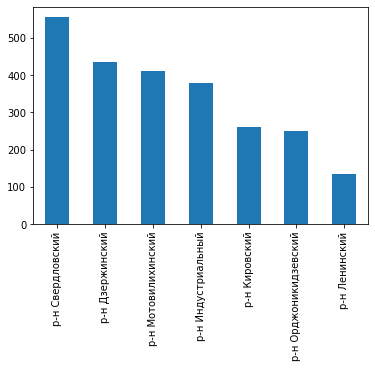

In [16]:
df['address'].value_counts().plot(kind='bar')

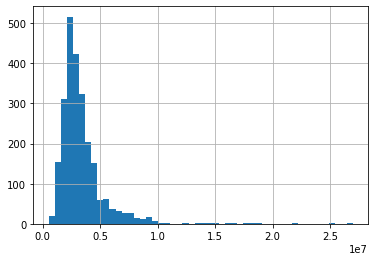

In [17]:
df['price'].hist(bins=50)

#### Ящик с усами

In [18]:
np.median(df['price'])

2850000.0

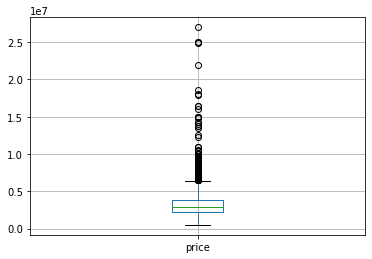

In [19]:
df.boxplot(column='price')

Populating the interactive namespace from numpy and matplotlib


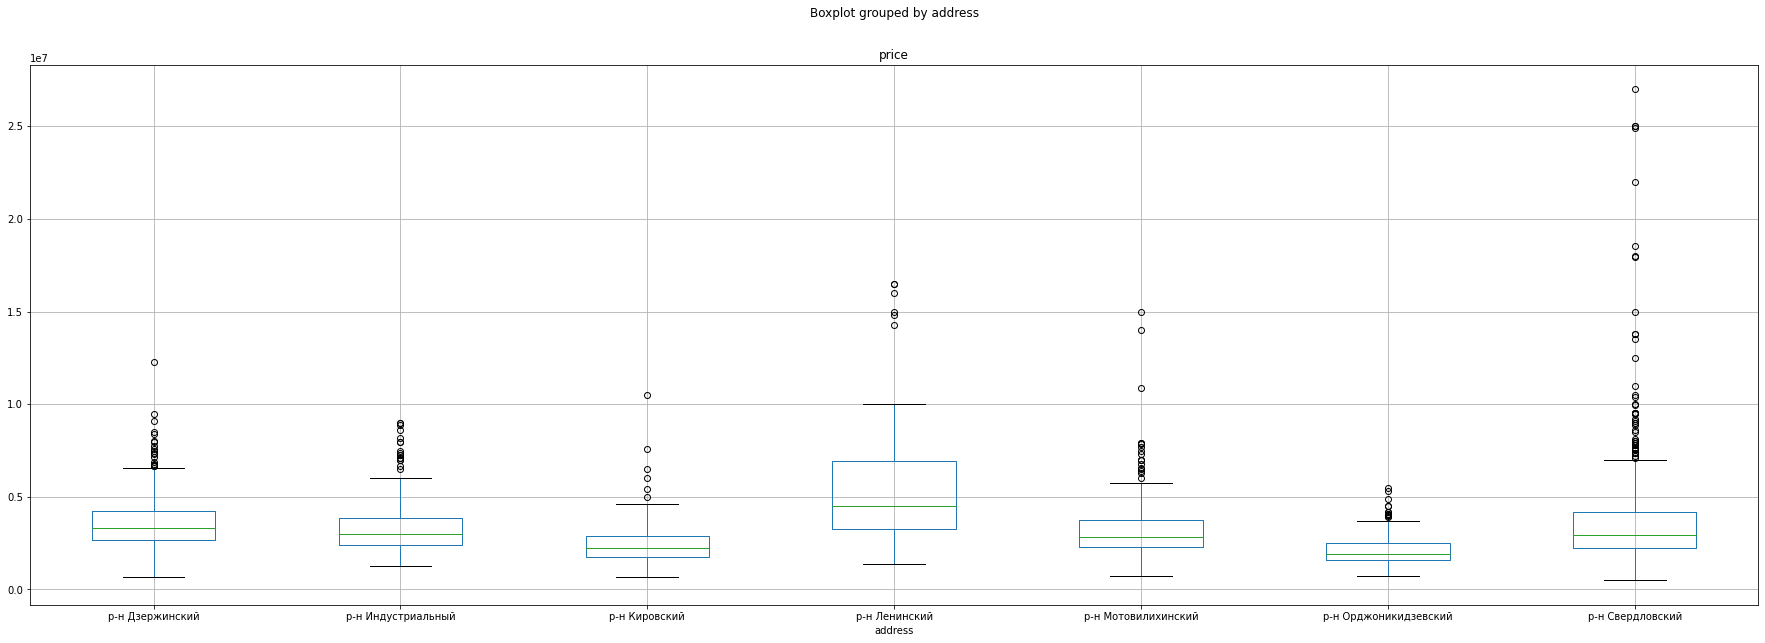

In [20]:
%pylab inline
import matplotlib.pyplot as plt

df.boxplot(column='price',  by='address', figsize=(30,10))
plt.show()

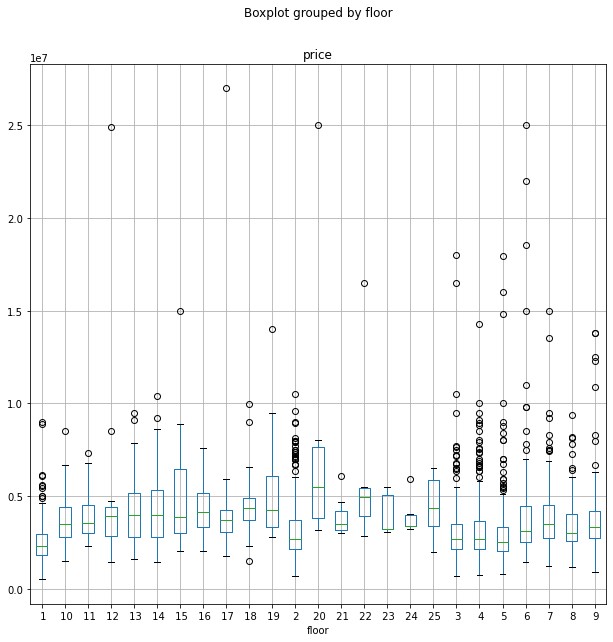

In [21]:
df.boxplot(column='price',  by='floor', figsize=(10,10))
plt.show()

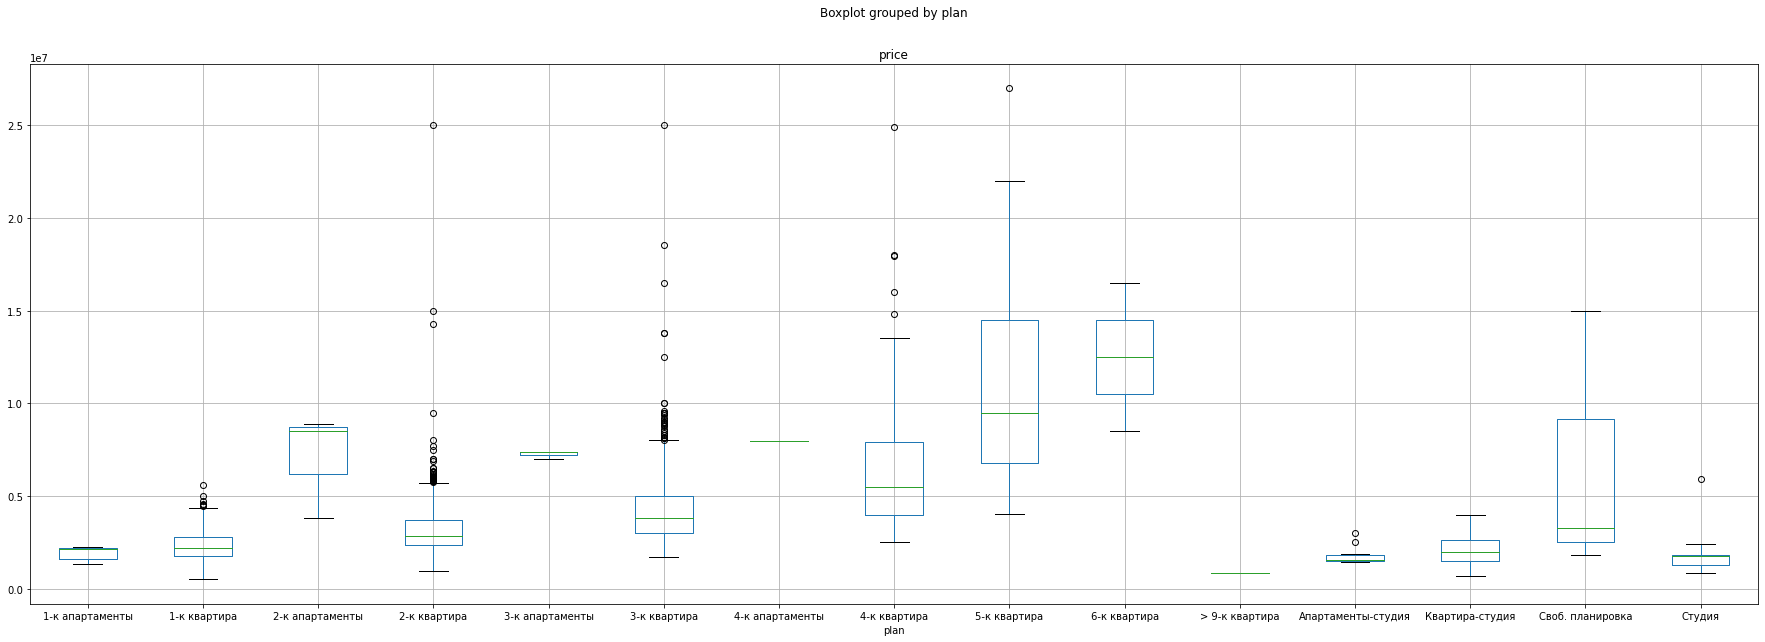

In [22]:
df.boxplot(column='price',  by='plan', figsize=(30,10))
plt.show()

#### Разброс значений

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3,ncols=3,figsize=(15,15))

for i, (name, group) in enumerate(df.groupby('address')):
    axes = axes.flatten()
    axes[i].scatter(group['price'],group['square'], color ='blue')
    axes[i].set_title(name)
    axes[i].set(xlabel='Стоимость', ylabel='Площадь, м2')
    
fig.tight_layout()  

### 6. Рейтинг квартир с заданными весам

In [ ]:
def weighted_rating(df, features, weights):
    for c in features:
        count_ = df[c].value_counts()
        df.loc[:, ('count_'+c)] = df[c].map(count_)*weights[features.index(c)]
        
    df['raiting']=df.iloc[:, df.columns.str.contains('count_')].sum(1) 
    df = df.sort_values(by=['raiting'], ascending = False)
    df.drop(['raiting'], axis='columns', inplace=True)
    for c in features:
        df.drop( ['count_'+c], axis='columns', inplace = True)
        
    return df

In [ ]:
df1 = weighted_rating(df, ['price', 'square'], [0.4, 0.6])
df1

### 7. Оценка самой популярной площади, района, кол-ва комнат

In [ ]:
# самая популярная площадь
df.square.mode()

In [ ]:
# самый популярный район
df.address.mode()

In [ ]:
# самое популярное количество комнат
df.plan.mode()